# U'n'Eye: Convolutional Neural Network for Saccade Detection
Written by Kellen Vu, using the UnEye library developed by Bellet et al.

# Training

In [549]:
import numpy as np
import uneye
import matplotlib.pyplot as plt
import scipy.io as io
import os
from os.path import join as pj
import pickle

In [553]:
# Parameters
datapath = 'data/raymond/'
min_sacc_dur = 6  # Saccades shorter than this (ms) are removed
min_sacc_dist = 1  # Saccades closer than this (ms) apart are merged
sampfreq = 1000 # Hz
weights_name = 'weights_trained_raymond_yes_augment_y_x'  # This name will be used when we save the weights into a file

In [554]:
# Load dataset from .mat files
example_size = 1000  # Split the data into chunks that are each __ ms long
X = None
L = None
for file in os.listdir(datapath):
    mat = io.loadmat(datapath + file)
    X_new = mat['X']
    n_t = X_new.shape[1]
    X_new = X_new[:, :n_t - n_t % example_size].reshape(-1, example_size)
    L_new = mat['L']
    L_new = L_new[:, :n_t - n_t % example_size].reshape(-1, example_size)
    if X is None:
        X = X_new
        L = L_new
    else:
        X = np.concatenate((X, X_new), axis=0)
        L = np.concatenate((L, L_new), axis=0)
Y = np.zeros(X.shape)

In [463]:
# Load dataset from .csv files
x_filename = 'X_1000hz.csv'
y_filename = 'Y_1000hz.csv'
labels_filename = 'Labels_1000hz.csv'

X = np.loadtxt(datapath + x_filename, delimiter=',')
Y = np.loadtxt(datapath + y_filename, delimiter=',')
L = np.loadtxt(datapath + labels_filename, delimiter=',')

In [556]:
# Define train set
m = X.shape[0]
m_train = round(0.7 * m)  # Use a data split of 70/15/15
m_dev = round(0.15 * m)

X_train = X[:m_train + m_dev, :]
Y_train = Y[:m_train + m_dev, :]
L_train = L[:m_train + m_dev, :]

# Define model
model = uneye.DNN(sampfreq=sampfreq,
                  weights_name=weights_name,
                  min_sacc_dur=min_sacc_dur,
                  min_sacc_dist=min_sacc_dist,
                  augmentation=True,
                  val_samples=m_dev)

In [557]:
# Train model
# Weights will automatically be saved to local folder 'training'
model.train(X_train, Y_train, L_train)

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

Number of classes: 2
Using GPU: False
Training. Please wait.
Early stopping at epoch 104 before overfitting occurred.
Model parameters saved to ./training\weights_trained_raymond_yes_augment_y_x


In [278]:
# Alternatively, load pre-existing model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

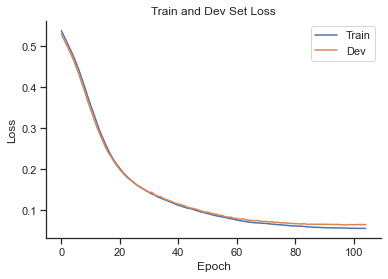

In [563]:
# Plot loss
fig, ax = plt.subplots()
ax.plot(model.loss_train, label='Train')
ax.plot(model.loss_val, label='Dev')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train and Dev Set Loss')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

# Testing

In [560]:
# Define test set from train set
X_test = X[m_train + m_dev:, :]
Y_test = Y[m_train + m_dev:, :]
L_test = L[m_train + m_dev:, :]

In [561]:
# Test performance
prediction, probability, performance = model.test(X_test, Y_test, L_test)

Binary Cohens Kappa:  0.53
F1: 0.536


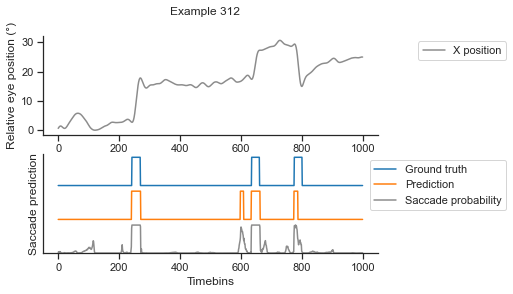

In [565]:
# Interactive plot (inline vs. qt)
%matplotlib inline

# Plot example
i = np.random.randint(X_test.shape[0])
i = 312
fig, ax = plt.subplots(2, 1)
fig.suptitle(f'Example {i}')
x_trace = X_test[i, :] - np.min(X_test[i, :])
ax[0].plot(x_trace, label='X position', c='k', alpha=0.5)
ax[0].set_ylabel('Relative eye position (°)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend(bbox_to_anchor=(1.4, 1))

# Prediction
ax[1].plot(L_test[i, :] + 2.4, label='Ground truth', c='tab:blue')
ax[1].plot(prediction[i, :] + 1.2, label='Prediction', c='tab:orange')
ax[1].plot(probability[i, :], label='Saccade probability', c='k', alpha=0.5)
ax[1].set_ylabel('Saccade prediction')
ax[1].set_xlabel('Timebins')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].legend(bbox_to_anchor=(1.4, 1))
ax[1].set_ylim([0, 3.5])
ax[1].set_yticks([])
plt.ion()
plt.show()

# Exploration

In [583]:
# Parameters
datapath = 'data/dataset3/'
min_sacc_dur = 6  # Saccades shorter than this (ms) are removed
min_sacc_dist = 1  # Saccades closer than this (ms) apart are merged
sampfreq = 500 # Hz
weights_name = 'delete_me'  # This name will be used when we save the weights into a file

In [584]:
# Load dataset from .csv files
x_filename = 'dataset3_500hz_X_setA.csv'
y_filename = 'dataset3_500hz_Y_setA.csv'
labels_filename = 'dataset3_500hz_Labels_setA.csv'

X = np.loadtxt(datapath + x_filename, delimiter=',')
Y = np.loadtxt(datapath + y_filename, delimiter=',')
L = np.loadtxt(datapath + labels_filename, delimiter=',')

In [585]:
# Interactive plot (inline vs. qt)
%matplotlib qt

x_trace = X.flatten()
y_trace = Y.flatten()
l_trace = L.flatten()

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(x_trace, label='X position')
# ax[0].plot(y_trace, label='Y position')
ax[0].set_ylabel('Relative eye position (°)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend(bbox_to_anchor=(1.4, 1))

# Prediction
ax[1].plot(l_trace, label='Ground truth', c='tab:blue')
ax[1].set_ylabel('Saccade')
ax[1].set_xlabel('Timebins')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].legend(bbox_to_anchor=(1.4, 1))
ax[1].set_ylim([0, 3.5])
ax[1].set_yticks([])

[]